In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
uni = pd.read_csv("Universities.csv")
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
uni.describe() # data should be normalized

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [ ]:
# Considering only numerical data
uni = uni.iloc[:,1:] # exclude 0th column i.e. univ. name
uni.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [ ]:
# Standardize the numerical data
std = StandardScaler()
uni_normal=std.fit_transform(uni)
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
pca=PCA()
pca_components=pca.fit_transform(uni_normal)

In [ ]:
# The amount of variance that each PCA explains is
pca.explained_variance_ # 1st column contains 4.80425527 variance .. upto 6th col contains 0.02755274 variance

array([4.80425527, 0.81960016, 0.29850193, 0.17060428, 0.12948562,
       0.02755274])

In [ ]:
# in percentage - The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [ ]:
# Cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1 # 76   76+13=89   89+4=93 and so on i.e. if you stop upto 3rd column still you will get 95 %

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [ ]:
# You would typically select the first few components that collectively explain a significant portion of the variance.
# You might decide to keep PCA1 and PCA2 because they cover about 90% of the variance.
# Relationship to Original Features:
# PCA transforms the original features into new, uncorrelated features (principal components).
# Therefore, after PCA, you no longer select individual original features (e.g., SAT, Top10) but instead use the principal components.

# Feature Importance and Original Features:
# If you want to interpret which original features contribute most to the principal components:
# Look at the absolute values of the coefficients (loadings) in pca.components_.
# Features with larger absolute values contribute more to that principal component.
# The feature with the highest contribution to PCA1 would be SAT, followed by Top10, GradRate, etc.

In [ ]:
pca.components_ # 6 dimensional components

array([[ 0.45774863,  0.42714437, -0.42430805, -0.39064831,  0.36252316,
         0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [-0.13124033, -0.37489567, -0.0612872 ,  0.50739095,  0.62340055,
         0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [ ]:
 # linear combination equation, constant values are taken from above array o/p
 # PCA1 = 0.45*SAT + 0.427*Top10 - 0.42*Accept - 0.39*SFRatio + 0.36*Expenses + 0.37*GradRate

 # Thus all 6 principal components can be calculated using above 6 values

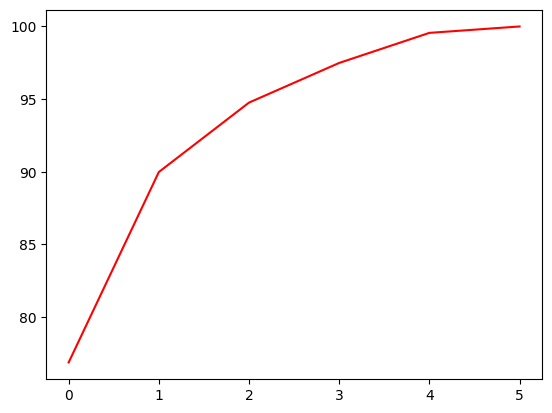

In [ ]:
# Variance plot for PCA components obtained
plt.plot(var1, color="red") # var1 is cumulative percentage on y axis and index on x axis
# looking at graph you can decide how much percentage you want and accordingly go for that much column numbers


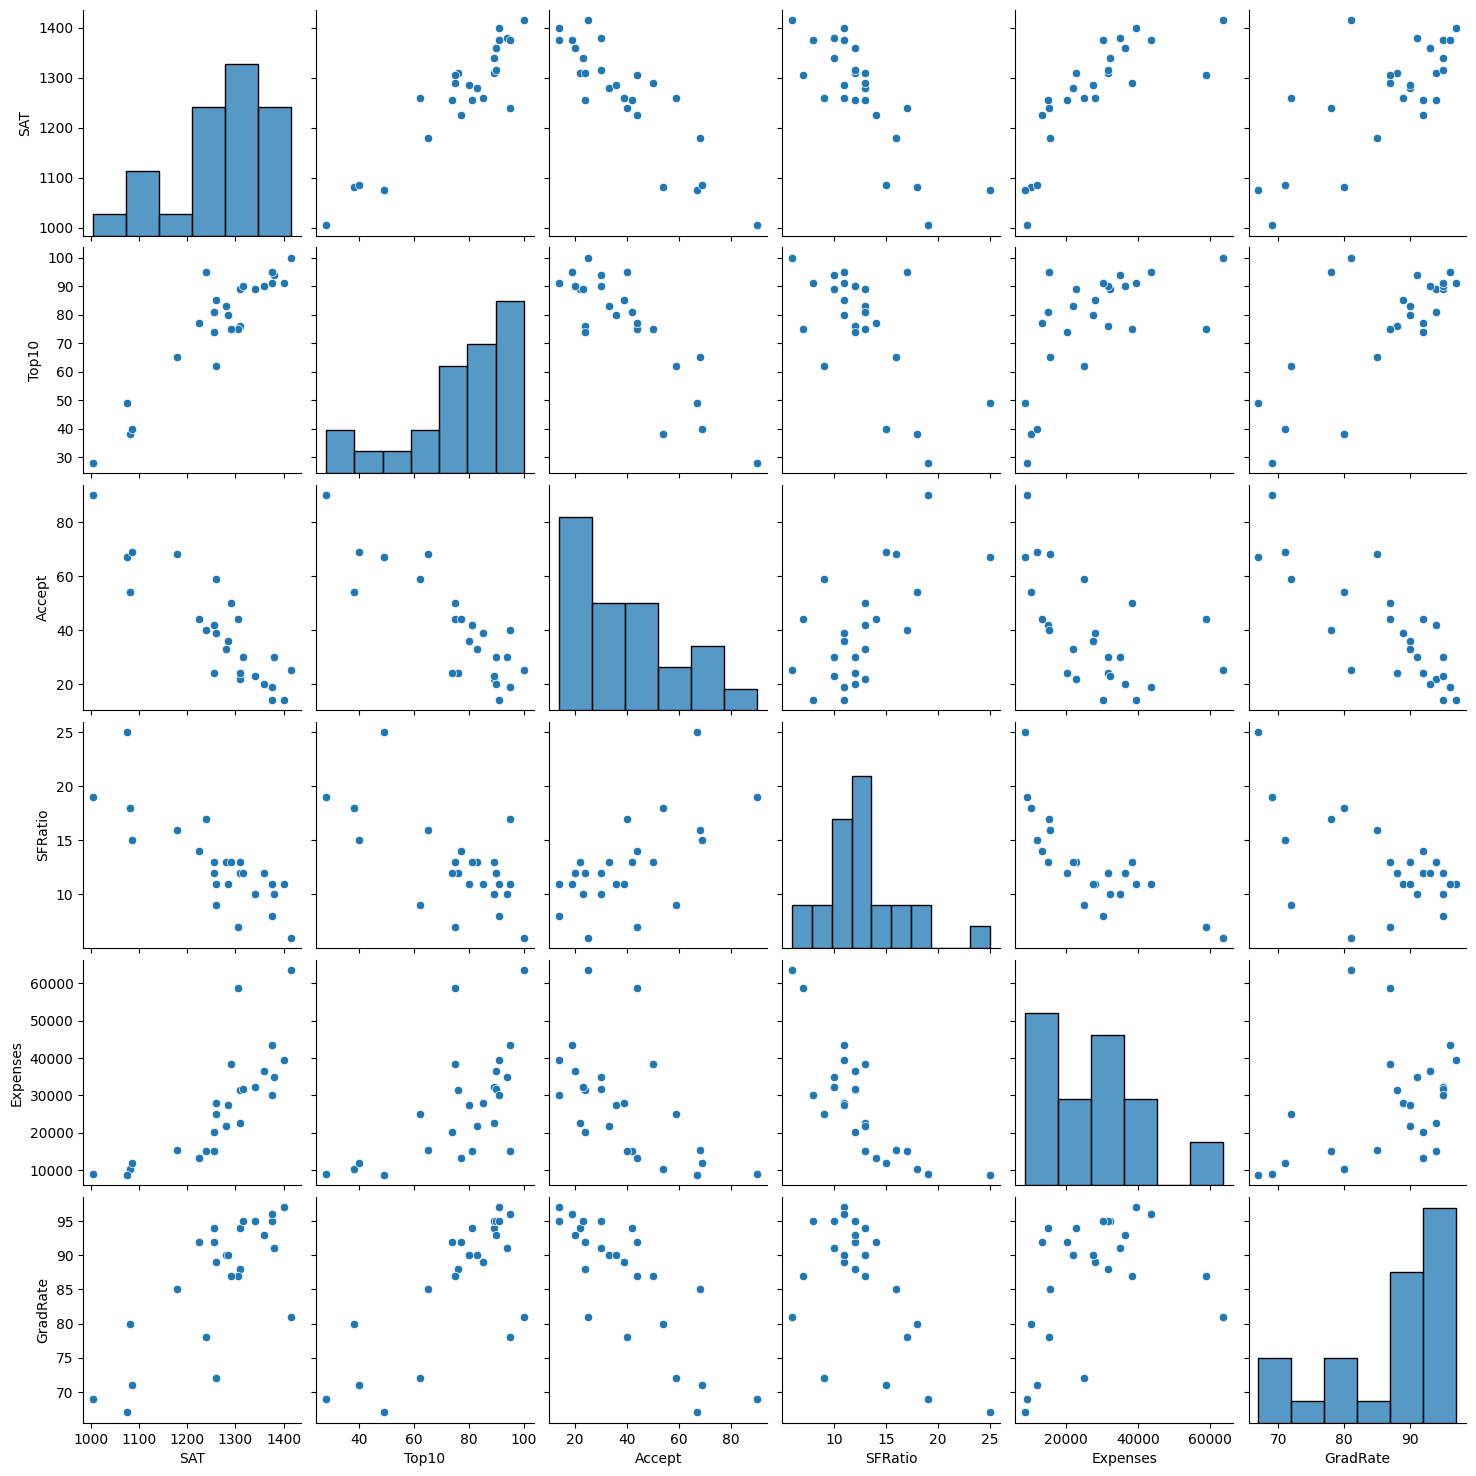

In [ ]:
import seaborn as sns
sns.pairplot(uni) # can check scatterplot with original dataset and see the difference

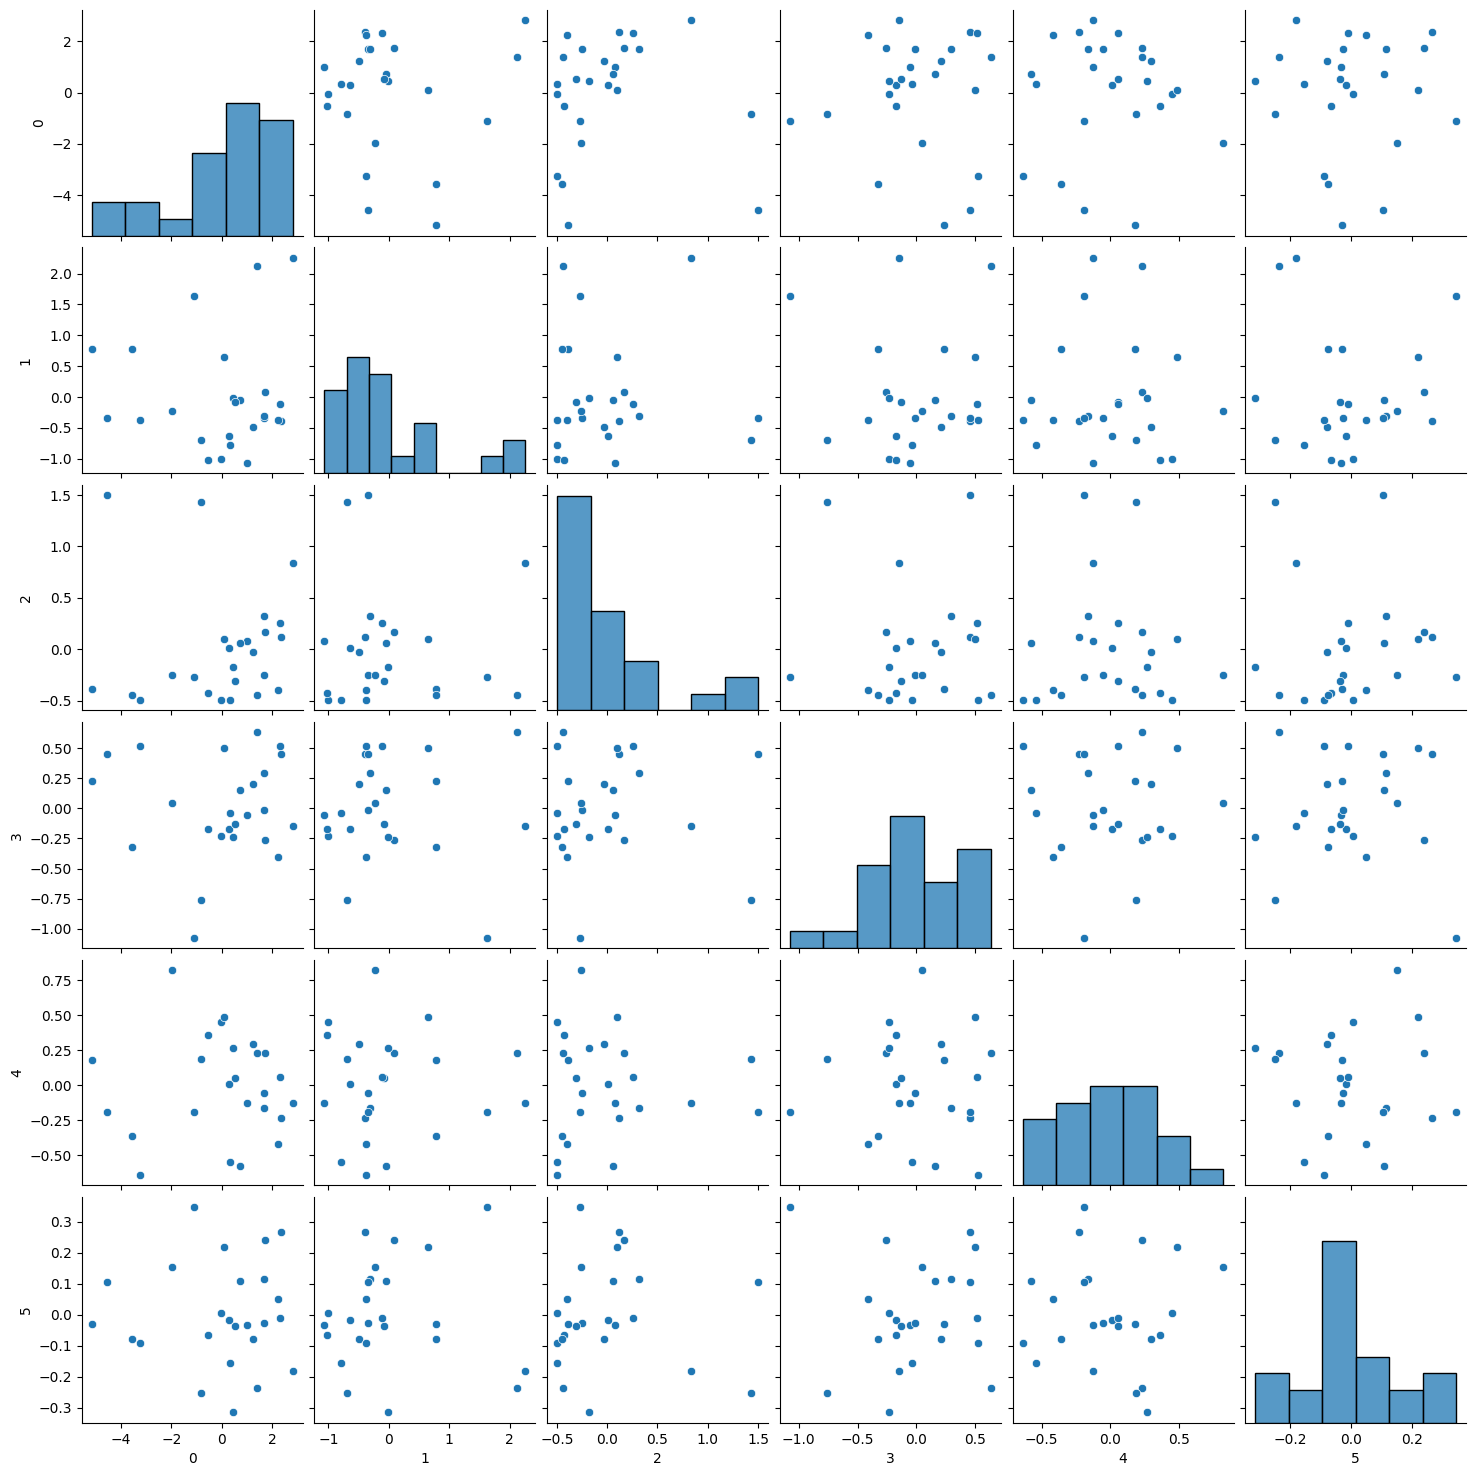

In [ ]:
# Why scatterplot? - After applying PCA there should not be any correlation. Thus multicollinearity is removed or not that you can cross check.
sns.pairplot(pd.DataFrame(pca_components))